<a href="https://colab.research.google.com/github/KarlaMichelleSorianoSanhez/EDP-1/blob/main/Ecuaciones_diferenciales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Subtema 2.2. El comando `dsolve` en SymPy (Python)

El comando `dsolve()` es la herramienta principal de **SymPy** para resolver ecuaciones diferenciales ordinarias de forma simbólica.

**Sintaxis general:**
```python
dsolve(eq, func=None, hint='default', simplify=True, ics=None,
       xi=None, eta=None, x0=0, n=6, **kwargs)


**Descripción de los parámetros:**

- `eq`: la ecuación diferencial a resolver, puede ser una igualdad `Eq()` o una expresión igualada a cero.
- `func`: la función incógnita (por ejemplo, `y(t)`), normalmente se detecta automáticamente.
- `hint`: sugiere un método específico para resolver la EDO (por ejemplo, 'separable', 'Bernoulli').
- `classify_ode(eq)` permite conocer todos los métodos posibles (`hints`) disponibles.
- `simplify`: aplica simplificaciones simbólicas al resultado (por defecto es `True`).
- `ics`: condiciones iniciales en forma de diccionario, por ejemplo `{y(0): 1, y'(0): 0}`.
- `xi`, `eta`: funciones infinitesimales usadas en métodos de simetría de Lie (generalmente no se usan en cursos básicos).
- `x0`: punto alrededor del cual se centra la solución en serie.
- `n`: número de términos en una solución en serie de potencias.

Este comando es muy flexible y permite resolver una amplia variedad de ecuaciones diferenciales, tanto con solución cerrada como en forma de series.

A continuación, mostramos un ejemplo básico de uso.

In [ ]:

import sympy as sp
from sympy import Function, symbols, Eq, Derivative, dsolve

# Definir variable y función
t = symbols('t')
y = Function('y')

# Definir una EDO sencilla: y'' - y = 0
edo = Eq(Derivative(y(t), t, t) - y(t), 0)

# Resolver la EDO con dsolve
sol = dsolve(edo, y(t))

# Mostrar la solución
sp.pprint(sol)

           -t       t
y(t) = C₁⋅ℯ   + C₂⋅ℯ 


###Subtema 1. Ecuación Logística
La ecuación logística modela el crecimiento de una población `p(t)` considerando un límite natural o "capacidad de carga". Su forma general es:

$
\frac{dp}{dt} = ap - bp^2, \quad p(0) = p_0$

donde:
- `a` es la tasa de crecimiento,
- `b` representa el efecto limitante (competencia),
- `p₀` es la población inicial.

Usaremos `SymPy` para:
1. Definir la ecuación diferencial y resolverla simbólicamente con `dsolve`,
2. Sustituir valores de parámetros con `subs`,
3. Graficar las soluciones para distintos valores iniciales usando `matplotlib`.

Este ejemplo también permite aplicar funciones auxiliares como `lambdify`, para convertir expresiones simbólicas en funciones evaluables numéricamente.

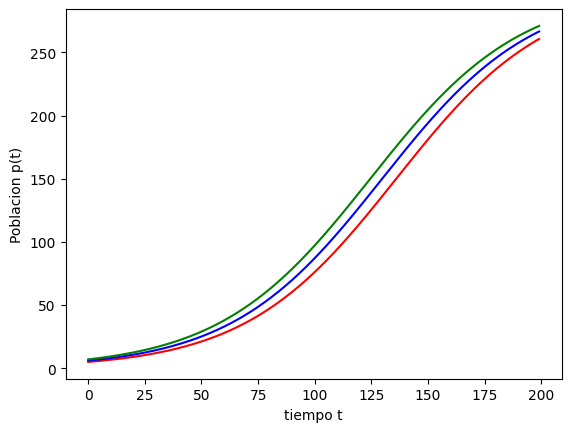

In [11]:
#importamos la librerías SymPy a Python

import sympy as sp
import numpy as exp

#Definimos las variables independiente y dependiente ası como los parametros de forma simbólica

t=sp.symbols('t')
p=sp.Function('p')
a=sp.symbols('a')
b=sp.symbols('b')
p0=sp.symbols('p0')

#definimos la ecuación diferencial con la condición inicial usando dsolve:

ode=sp.Eq(sp.Derivative(p(t),t)-a*p(t)+b*p(t)*p(t),0)
sol = sp.dsolve(ode,p(t),ics={p(0):p0})

#Obteniendo así la solución:

sp.Eq(p(t), a*sp.exp(a*(t+sp.log(b*p0/(-a+b*p0))/a))/(b*(sp.exp(a*(t+sp.log(b*p0/(-a + b*p0))/a)) - 1)))

#Definimos a continuación los valores de a,b y p0, y evaluamos las respectivas soluciones (una para cada condición inicial):

constants={a:0.03,b:0.0001,p0:5}
sol1=sol.subs(constants)
constants={a:0.03,b:0.0001,p0:6}
sol2=sol.subs(constants)
constants={a:0.03,b:0.0001,p0:7}
sol3=sol.subs(constants)

#La función lambdify permite definir una función a partir de la expresión simbolica:

func1 = sp.lambdify(t,sol1.rhs,'numpy')
func2 = sp.lambdify(t,sol2.rhs,'numpy')
func3 = sp.lambdify(t,sol3.rhs,'numpy')

#importamos los módulos scipy, matplotlib y pyplot para graficar nuestras soluciones:

import numpy as np # Import numpy
import scipy
tt = np.arange(0,200,1) # Use np.arange
pp1 = func1(tt)
pp2 = func2(tt)
pp3 = func3(tt)
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.plot(tt,pp1,'r',tt,pp2,'b',tt,pp3,'g')
plt.xlabel('tiempo t')
plt.ylabel('Poblacion p(t)')
plt.show()


In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Function, Eq, Derivative, dsolve, lambdify

# Definir variables independientes y dependientes asi como los parametros en forma simbolica
t = sp.symbols('t')
p = sp.Function('p')
a, b, p0 = sp.symbols('a b p0')

# Definir la ecuación diferencial (logistica)
ode = sp.Eq(Derivative(p(t), t), a*p(t) - b*p(t)**2)

# Resolver la EDO con condición inicial usando 'dsolve'
sol = dsolve(ode, p(t), ics={p(0): p0})

# Mostrar solución simbólica
sp.pprint(sol)

               ⎛       ⎛  b⋅p₀   ⎞⎞   
               ⎜    log⎜─────────⎟⎟   
               ⎜       ⎝-a + b⋅p₀⎠⎟   
             a⋅⎜t + ──────────────⎟   
               ⎝          a       ⎠   
          a⋅ℯ                         
p(t) = ───────────────────────────────
         ⎛   ⎛       ⎛  b⋅p₀   ⎞⎞    ⎞
         ⎜   ⎜    log⎜─────────⎟⎟    ⎟
         ⎜   ⎜       ⎝-a + b⋅p₀⎠⎟    ⎟
         ⎜ a⋅⎜t + ──────────────⎟    ⎟
         ⎜   ⎝          a       ⎠    ⎟
       b⋅⎝ℯ                       - 1⎠


A continuación, sustituimos valores específicos para los parámetros `a`, `b` y condiciones iniciales `p₀ = 5, 6, 7` y graficamos las soluciones en el intervalo `t ∈ [0, 200]`.

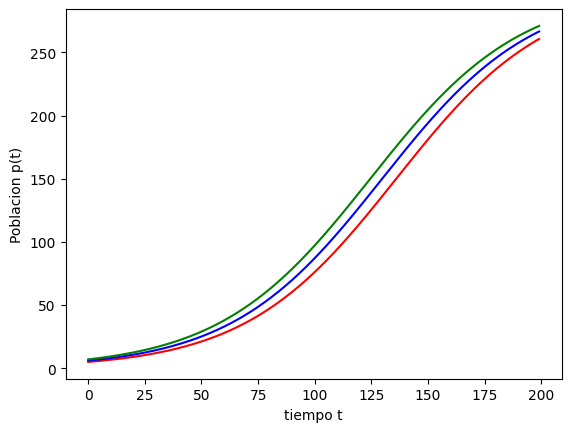

In [7]:
# Sustituir valores de parámetros
valores1 = {a: 0.03, b: 0.0001, p0: 5}
valores2 = {a: 0.03, b: 0.0001, p0: 6}
valores3 = {a: 0.03, b: 0.0001, p0: 7}

# Sustituir en la solución
sol1 = sol.subs(valores1)
sol2 = sol.subs(valores2)
sol3 = sol.subs(valores3)

# Crear funciones numéricas con lambdify. Es decir La función lambdify permite definir una función a partir de la expresión simbolica:
func1 = sp.lambdify(t, sol1.rhs, 'numpy')
func2 = sp.lambdify(t, sol2.rhs, 'numpy')
func3 = sp.lambdify(t, sol3.rhs, 'numpy')


#importamos los módulos scipy, matplotlib y pyplot para graficar nuestras soluciones:

import numpy as np # Import numpy
import scipy
tt = np.arange(0,200,1) # Use np.arange
pp1 = func1(tt)
pp2 = func2(tt)
pp3 = func3(tt)
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.plot(tt,pp1,'r',tt,pp2,'b',tt,pp3,'g')
plt.xlabel('tiempo t')
plt.ylabel('Poblacion p(t)')
plt.show()



### Subtema 2. Ecuación de Lagrange

La ecuación que se analiza es:

$y = 2x y' + \log(y')$


Es una ecuación no lineal de primer orden. En Python se resuelve con `dsolve` y la solución incluye la función especial `LambertW`.

Se obtiene una solución implícita en \( y(x) \), que depende de una constante \( C_1 \). Esto permite generar una familia de curvas solución.


Para resolverla en Python usamos la librería **SymPy**, que permite manipulación simbólica. Esta ecuación es difícil de despejar directamente porque involucra \( y' \) tanto dentro de un logaritmo como fuera. SymPy la resuelve utilizando una **función especial llamada LambertW**, que es la inversa de \( w e^w \).

La solución no es explícita en términos de \( y(x) \), pero nos permite **analizar y graficar una familia de soluciones** dependiendo del valor de la constante arbitraria \( C_1 \).


In [12]:
from sympy import *
import sympy as sp

x = sp.symbols('x')
y = sp.Function('y')

# Definimos la ecuación: y = 2x y' + log(y')
ode2 = Eq(log(Derivative(y(x), x)) + 2*x*Derivative(y(x), x), y(x))

# Resolvemos simbólicamente
sol2 = dsolve(ode2, y(x))
pprint(sol2)

               ⎛ ⎛     y(x)⎞    ⎞    ⎛     y(x)⎞    
C₁ - y(x) - log⎝W⎝2⋅x⋅ℯ    ⎠ + 2⎠ + W⎝2⋅x⋅ℯ    ⎠ = 0


La solución simbólica en Python es:

$(C_1 y(x) - \log(\text{LambertW}(2x e^{y(x)}) + 2) + \text{LambertW}(2x e^{y(x)}), 0)$

No es posible despejar \( y(x) \), pero se puede graficar una expresión equivalente para distintos valores de \( C_1 \).

Aunque no tenemos una forma explícita para $y(x) $, podemos usar una **fórmula equivalente** que depende de $ C_1 $ y graficarla para varios valores de esta constante. Esto nos permite visualizar una **familia de soluciones**.




<ipython-input-14-958f19d1ef47>:10: RuntimeWarning: invalid value encountered in sqrt
  y_vals = np.log(((4*C1*x_vals + 1)**0.5 - 1)/(2*x_vals) + (4*C1*x_vals + 1)**0.5 - 1)
<ipython-input-14-958f19d1ef47>:10: RuntimeWarning: divide by zero encountered in log
  y_vals = np.log(((4*C1*x_vals + 1)**0.5 - 1)/(2*x_vals) + (4*C1*x_vals + 1)**0.5 - 1)


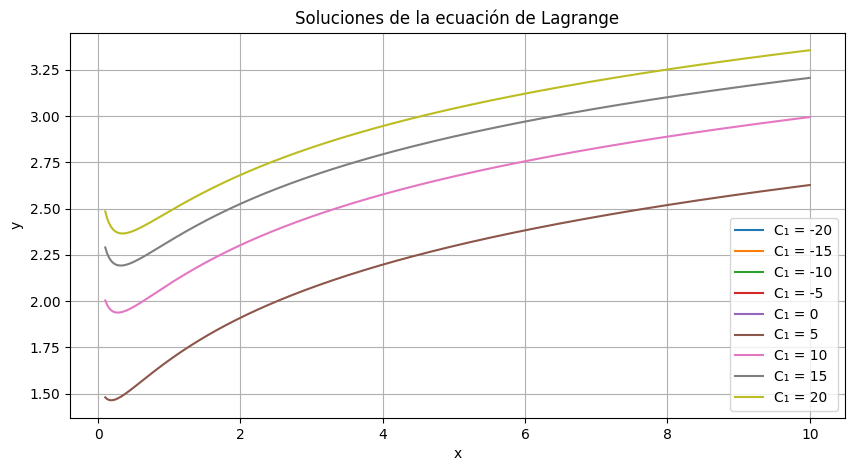

In [14]:
import numpy as np
import matplotlib.pyplot as plt

x_vals = np.linspace(0.1, 10, 400)
C1_vals = [-20, -15, -10, -5, 0, 5, 10, 15, 20]

plt.figure(figsize=(10, 5))

for C1 in C1_vals:
    y_vals = np.log(((4*C1*x_vals + 1)**0.5 - 1)/(2*x_vals) + (4*C1*x_vals + 1)**0.5 - 1)
    plt.plot(x_vals, y_vals, label=f'C₁ = {C1}')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Soluciones de la ecuación de Lagrange')
plt.grid(True)
plt.legend()
plt.show()

#Cada valor de \( C_1 \) genera una curva diferente. Esto nos permite visualizar una familia de soluciones, incluso si no se puede escribir \( y(x) \) en forma explícita.



### Subtema 3. Resonancia

Se resuelve una ecuación diferencial de segundo orden no homogénea:
$
y'' + 16y = 8\sin(4t), \quad y(0) = 1, \quad y'(0) = 0$

Este problema representa un sistema oscilatorio forzado. Dado que la frecuencia del forzamiento es igual a la natural (\( \omega = 4 \)), el sistema entra en **resonancia**.

Usamos `dsolve` de SymPy para resolverla simbólicamente y graficamos la solución.


In [15]:
from sympy import *
import sympy as sp

t = sp.symbols('t')
y = sp.Function('y')

# Ecuación diferencial con fuerza resonante
ode3 = Eq(Derivative(y(t), t, t) + 16*y(t), 8*sin(4*t))

# Condiciones iniciales
sol3 = dsolve(ode3, y(t), ics={y(0): 1, Derivative(y(t), t).subs(t, 0): 0})
pprint(sol3)


                          sin(4⋅t)
y(t) = (1 - t)⋅cos(4⋅t) + ────────
                             4    


La solución simbólica es:

$y(t) = \cos(4t) + \frac{3\sin(4t)}{16} - \frac{t\cos(4t)}{2}$

La presencia del término \( -\frac{t\cos(4t)}{2} \) indica que la amplitud **crece con el tiempo**, lo cual es característico de la **resonancia**.


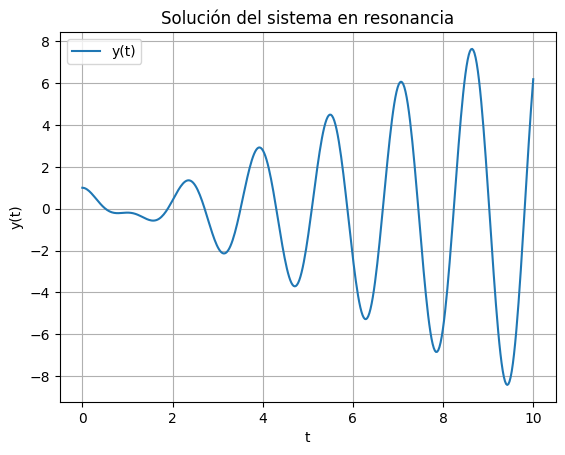

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Convertimos la solución simbólica a función numérica
y_func = lambdify(t, sol3.rhs, modules='numpy')

# Tiempo de 0 a 10 segundos
tt = np.linspace(0, 10, 400)
yy = y_func(tt)

# Graficamos la solución
plt.plot(tt, yy, label='y(t)')
plt.title('Solución del sistema en resonancia')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.grid(True)
plt.legend()
plt.show()


###Subtema 5. Una ecuación homogénea de Cauchy-Euler de cuarto orden:

 $x^4y^4(x) + 6x^3y^3(x) + 9x^2y′′(x) + 3xy′(x) +y(x) = 0$


In [8]:
from sympy import *
import sympy as sp

x=sp.symbols('x')
y=sp.Function('y')
C1, C2, C3, C4 = symbols("C1, C2, C3, C4")
ode5=sp.Eq(x**4*sp.Derivative(y(x),x,4)+6*x*x*x*sp.Derivative(y(x),x,3)+9*x**2*sp.Derivative(y(x),x,2)+3*x*sp.Derivative(y(x),x)+y(x),0)
sol5 = sp.dsolve(ode5,y(x))

#Para obtener
Eq(y(x),C3*sin(log(x))+C4*cos(log(x))+ (C1*sin(log(x))+C2*cos(log(x)))*log(x))

#La literatura nos dice que un metodo de solucion de las ecuaciones de Cauchy Euler implica la substitucion  $y=x^n$.

n=sp.symbols('n')
eq=simplify(ode5.subs(y(x),x**n))
factor(eq)



Eq(x**n*(n**2 + 1)**2, 0)

### Subtema 6. Una ecuacion con problema de valor inicial con deltas de Dirac como fuentes
Dada la ecuacion $y′′(t)−4y′(t) + 4y(t) = 3δ(t−1) +δ(t−2),  \quad  y(0) = 1,  y′(0) = 1.$


In [9]:
from sympy import *
import sympy as sp

#Definimos las funciones y las variables

t=sp.symbols('t')
y=sp.Function('y')
ode6=sp.Eq(sp.Derivative(y(t),t,2)-4*sp.Derivative(y(t),t)+4*y(t),3*DiracDelta(t-1)+DiracDelta(t-2))
sol6 = sp.dsolve(ode6)
constants=solve([sol6.rhs.subs(t,0)-1,sol6.rhs.diff(t,1).subs(t,0)-1])
sol6.subs(constants)

#Obteniendo

Eq(y(t), (t*(exp(-4)*Heaviside(t-2)+3*exp(-2)*Heaviside(t-1)-1)-2*exp(-4)*Heaviside(t-2) - 3*exp(-2)*Heaviside(t-1)+1)*exp(2*t))



Eq(y(t), (t*(exp(-4)*Heaviside(t - 2) + 3*exp(-2)*Heaviside(t - 1) - 1) - 2*exp(-4)*Heaviside(t - 2) - 3*exp(-2)*Heaviside(t - 1) + 1)*exp(2*t))

### Subtema 7. Sistema masa-resorte

Este modelo describe el movimiento de una masa unida a un resorte cuya fuerza de restitución disminuye con el tiempo. Este comportamiento se representa con un término exponencial en la constante del resorte. La ecuación diferencial que modela este sistema es:

$m y''(t) + k e^{-\alpha t} y(t) = 0$

donde:
- `m` es la masa del cuerpo,
- `k` es la constante del resorte,
- `α` es el coeficiente de decaimiento,
- `y(t)` es la posición de la masa con respecto al tiempo.


En este caso, la constante del resorte `k` se ve afectada por un término exponencial que depende del tiempo `t`. Esto puede interpretarse como un resorte que pierde rigidez (o fuerza de restitución) con el paso del tiempo.

Se trata de una ecuación diferencial **lineal, homogénea y de segundo orden con coeficientes variables**.

Esta ecuación se puede resolver simbólicamente en Python usando la librería **SymPy** y el comando `dsolve()`. El resultado se presenta como una **serie de potencias**, lo cual es común cuando los coeficientes dependen del tiempo y no se dispone de una solución cerrada con funciones elementales.Es  decir como la solución no puede expresarse con funciones elementales, SymPy devuelve una **serie de potencias** centrada en `t = 0`.

In [ ]:
# Resolución del sistema masa-resorte en SymPy
from sympy import *
import sympy as sp

#Definición de variables simbolicas y función

t = sp.symbols('t')
y = sp.Function('y')
m = sp.symbols('m')
k = sp.symbols('k')
a = sp.symbols('a')

# Definición de la ecuación diferencial
ode7 = sp.Eq(m*sp.Derivative(y(t), t, t) + k*sp.exp(-a*t)*y(t), 0)

# Solución simbólica en serie de potencias
sol7 = sp.dsolve(ode7, y(t))

# Mostrar la solución
sp.pprint(sol7)

          ⎛ 2  4  -2⋅a⋅t      2  -a⋅t    ⎞        ⎛     2  -a⋅t    ⎞        
          ⎜k ⋅t ⋅ℯ         k⋅t ⋅ℯ        ⎟        ⎜  k⋅t ⋅ℯ        ⎟    ⎛ 6⎞
y(t) = C₂⋅⎜───────────── - ────────── + 1⎟ + C₁⋅t⋅⎜- ────────── + 1⎟ + O⎝t ⎠
          ⎜        2          2⋅m        ⎟        ⎝     6⋅m        ⎠        
          ⎝    24⋅m                      ⎠                                  


### Subtema 9. Ecuación de Airy

La ecuación diferencial que se estudia es:

$y''(t) - t y(t) = 0$

SymPy puede resolver esta ecuación de dos formas:

1. **Solución general**, en términos de funciones especiales de Airy: `airyai(t)` y `airybi(t)`.
2. **Solución en serie de potencias**, centrada en un punto como `t = 0` o `t = 1`, útil para aproximaciones o gráficas.

A continuación se muestra cómo se implementa esto en Python usando SymPy.

In [ ]:
import sympy as sp

t = sp.symbols('t')
y = sp.Function('y')

# Definimos la ecuación de Airy
ode9 = sp.Eq(sp.Derivative(y(t), t, t) - t*y(t), 0)

# Solución general (con funciones de Airy)
sol9 = sp.dsolve(ode9, y(t))
sp.pprint(sol9)

y(t) = C₁⋅Ai(t) + C₂⋅Bi(t)


Obtenemos así una solución que incluye funciones de Airy:

$y(t) = C_1 \cdot \text{airyai}(t) + C_2 \cdot \text{airybi}(t)$

Para obtener una **solución en serie de potencias centrada en cero**, usamos `hint='2nd_power_series_ordinary'` y condiciones iniciales:


$y(0) = 1, \quad y'(0) = 0$

In [ ]:
# Solución en serie centrada en cero
sols9 = dsolve(ode9, hint='2nd_power_series_ordinary')

# Condiciones iniciales: y(0) = 1, y′(0) = 0
constants = solve([
    sols9.rhs.subs(t, 0) - 1,
    sols9.rhs.diff(t).subs(t, 0)
], dict=True)[0]

# Sustitución y expansión
ysol = expand(sols9.rhs.subs(constants))
pprint(ysol.series(t, 0, 6))

     3        
    t     ⎛ 6⎞
1 + ── + O⎝t ⎠
    6         


Y así obtenemos la serie centrada en 0:

$1 + t + \frac{t^3}{6} + \frac{t^4}{12} + \mathcal{O}(t^6)$

También se puede obtener una **serie centrada en t = 1**, con condiciones:

$y(1) = 1, \quad y'(1) = 1$

In [ ]:
# Serie centrada en t = 1 a partir de la solución general
s9 = simplify(series(sol9.rhs, t, 1))
ds9 = diff(s9, t)

# Condiciones: y(1) = 1, y′(1) = 1
constants = solve([
    s9.subs(t, 1) - 1,
    ds9.subs(t, 1) - 1
], dict=True)[0]

# Sustitución y expansión
ss9 = s9.subs(constants)
pprint(simplify(series(ss9, t, 1, 6)))

       2               3                                 3                                 4       ↪
(t - 1)         (t - 1) ⋅Ai'(1)⋅Bi(1)             (t - 1) ⋅Ai(1)⋅Bi'(1)             (t - 1) ⋅Ai'(1 ↪
──────── + ─────────────────────────────── - ─────────────────────────────── + ─────────────────── ↪
   2       3⋅Ai'(1)⋅Bi(1) - 3⋅Ai(1)⋅Bi'(1)   3⋅Ai'(1)⋅Bi(1) - 3⋅Ai(1)⋅Bi'(1)   8⋅Ai'(1)⋅Bi(1) - 8⋅ ↪

↪                            4                                  5                                  ↪
↪ )⋅Bi(1)             (t - 1) ⋅Ai(1)⋅Bi'(1)              (t - 1) ⋅Ai'(1)⋅Bi(1)               (t -  ↪
↪ ──────────── - ─────────────────────────────── + ───────────────────────────────── - ─────────── ↪
↪ Ai(1)⋅Bi'(1)   8⋅Ai'(1)⋅Bi(1) - 8⋅Ai(1)⋅Bi'(1)   24⋅Ai'(1)⋅Bi(1) - 24⋅Ai(1)⋅Bi'(1)   24⋅Ai'(1)⋅B ↪

↪   5                                                                                              ↪
↪ 1) ⋅Ai(1)⋅Bi'(1)               t⋅Ai'(1)⋅Bi(1)                t⋅Ai(1)⋅Bi'(1)           ⎛

Y así obtenemos la serie centrada en 1:

$(t - 1)^2/2 + (t - 1)^3/3 + (t - 1)^4/8 + (t - 1)^5/24 + \dots$

más términos con productos de las funciones `airyai`, `airybi`, y sus derivadas evaluadas en `t = 1`.

#### Gráfica de las soluciones con diferentes condiciones iniciales

Resolvemos la ecuación de Airy con dos conjuntos distintos de condiciones iniciales:

- Solución \( y_1(t) \): \( y_1(0) = 0 \), \( y_1'(0) = 1 \)
- Solución \( y_2(t) \): \( y_2(0) = 1 \), \( y_2'(0) = 0 \)

Estas soluciones nos permiten observar el comportamiento del sistema tanto para valores negativos como positivos de \( t \). Usamos `lambdify` para graficarlas.

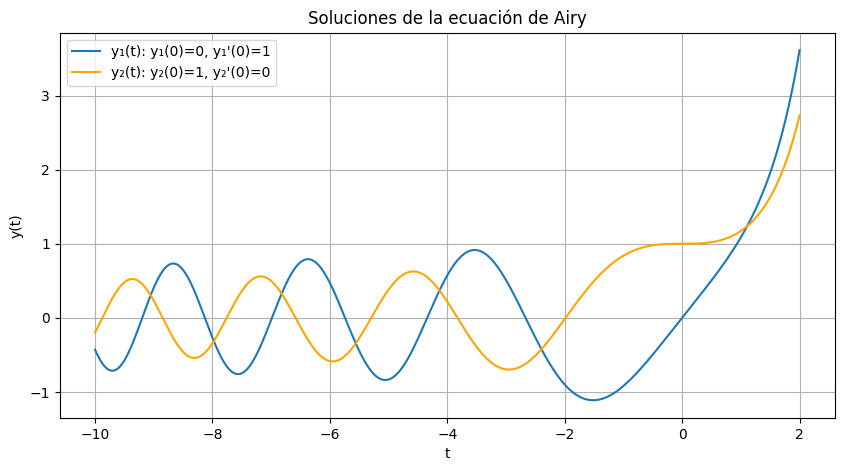

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import Derivative, lambdify, dsolve

# Resolver y₁: y₁(0) = 0, y₁′(0) = 1
sol_y1 = dsolve(ode9, y(t), ics={y(0): 0, Derivative(y(t), t).subs(t, 0): 1})
y1_func = lambdify(t, sol_y1.rhs, modules='scipy')  # <--- AQUÍ EL CAMBIO

# Resolver y₂: y₂(0) = 1, y₂′(0) = 0
sol_y2 = dsolve(ode9, y(t), ics={y(0): 1, Derivative(y(t), t).subs(t, 0): 0})
y2_func = lambdify(t, sol_y2.rhs, modules='scipy')  # <--- AQUÍ TAMBIÉN

# Intervalo de tiempo
tt = np.linspace(-10, 2, 500)

# Evaluar funciones
y1_vals = y1_func(tt)
y2_vals = y2_func(tt)

# Graficar
plt.figure(figsize=(10, 5))
plt.plot(tt, y1_vals, label="y₁(t): y₁(0)=0, y₁'(0)=1")
plt.plot(tt, y2_vals, label="y₂(t): y₂(0)=1, y₂'(0)=0", color='orange')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Soluciones de la ecuación de Airy')
plt.grid(True)
plt.legend()
plt.show()

### Subtema 10. Campo de direcciones de una ecuación diferencial

La ecuación diferencial que se analiza es:

$
x'(t) = e^{-t} - 2x(t)$

El **campo de direcciones** representa gráficamente la pendiente de las soluciones en cada punto del plano. Nos ayuda a entender visualmente el comportamiento de las soluciones sin necesidad de resolver la EDO.

Para generar esta gráfica en Python se utilizan `NumPy` para crear la malla, y `Matplotlib` para mostrar las flechas del campo vectorial con `quiver`.

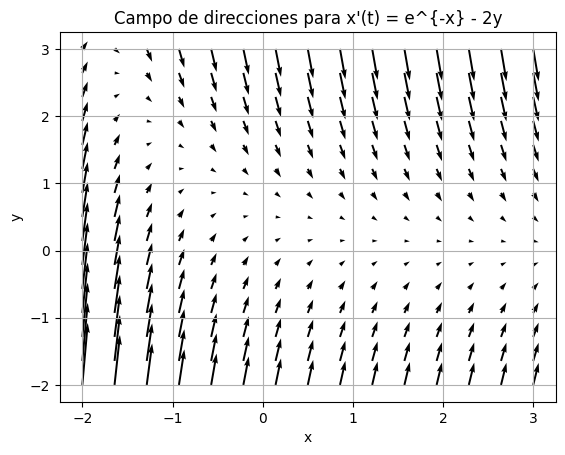

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Crear malla (grid) de puntos en el plano (x, y)
x, y = np.meshgrid(np.linspace(-2, 3, 15), np.linspace(-2, 3, 15))

# Definir la pendiente: x'(t) = exp(-x) - 2*y
u = 1  # eje horizontal constante (t no varía en campo de direcciones)
v = np.exp(-x) - 2*y  # derivada dx/dt

# Graficar el campo de direcciones
plt.quiver(x, y, u, v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Campo de direcciones para x\'(t) = e^{-x} - 2y')
plt.grid(True)
plt.axis('tight')
plt.show()

###Subtema 12. Problema de valor inicial para una ecuacion no lineal (solucion numérica).:

Dada la ecuación $y′(t) = sen(y^2(t)), \quad y(0) = 1.$


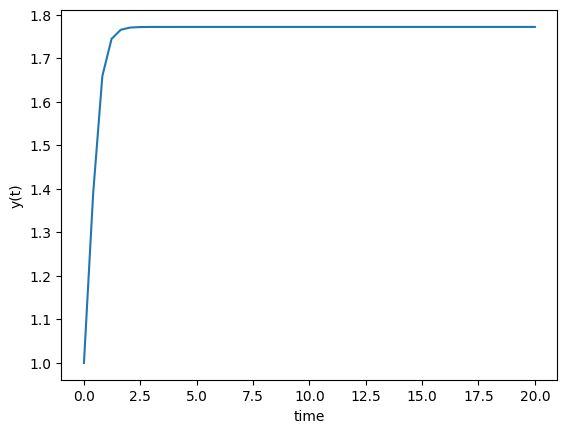

In [10]:
#importamos la librerías
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
sin = np.sin

#Definimos ahora la funcion que define el lado derecho de la ecuación diferencial $\frac{dy}{dt}=f(y, t)$

def model(y,t):
  dydt=sin(y*y)
  return dydt

y0 = 1
t=np.linspace(0,20)

#Resolvemos numéricamente con odeint: y graficamos

y=odeint(model,y0,t)
plt.plot(t,y)
plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()